# <font>Kidney Stone Prediction based on Urine Analysis<font><a class='anchor' id='top'></a>

<div class="alert alert-block alert-info"> 

Predict the presence of kidney stones based on urine analysis. 

What does this really mean? 

We ultimately want to predict some target (X) by using various inputs(y)s. In this case we want to predict the presence of Kidney Stones, `1 = we see a presence` and `0 = We see no presence`, Therefore this is a `Binary Classification` problem where something exists or it doesn't. </div>

# <font>Data Understanding I<font><a class='anchor' id='top'></a>


This dataset can be used to predict the presence of kidney stones based on urine analysis.

The `79 urine specimens`, were analyzed in an effort to
determine if certain `physical characteristics of the urine` might be related to the
formation of `calcium oxalate crystals`.

The `six physical characteristics` of the urine are: 

- `(1) specific gravity`, the density of the urine relative to water;
- `(2) pH`, the negative logarithm of the hydrogen ion; 
- `(3) osmolarity (mOsm)`, a unit used in biology and medicine but not in
physical chemistry. Osmolarity is proportional to the concentration of
molecules in solution;
- `(4) conductivity (mMho milliMho)`. One Mho is one reciprocal Ohm.
Conductivity is proportional to the concentration of charged
ions in solution; 
- `(5) urea concentration in millimoles per litre`;
- `(6) calcium concentration (CALC) in millimolesllitre`.

The data is obtained from 'Physical Characteristics of Urines With and Without Crystals', a chapter from Springer Series in Statistics.

# <font>Data Understanding II<font><a class='anchor' id='top'></a>
    
There are two datasets: the original dataset and the generated dataset; we will be using both to compare and contrast features etc.

Files from the generated dataset:

- `train.csv` - the training dataset; `target` is the likelihood of a kidney stone being present
- `test.csv` - the test dataset; your objective is to `predict the probability of target`
- `sample_submission.csv` - a sample submission file in the correct format

Files from the original dataset:

- `kidney_stone_urine_analysis.csv`


# <font>Data Understanding III, Understanding our Features in Depth<font><a class='anchor' id='top'></a>

- `specific gravity`: Urine specific gravity is a laboratory test that shows the concentration of all chemical particles in the urine. The normal range for urine specific gravity is `1.005 to 1.030`. USG is the ratio of the density (mass of a unit volume) of urine to the density (mass of the same unit volume) of a reference substance (water). USG values vary between 1.000 and 1.040 g/mL, USG less than 1.008 g/mL is regarded as dilute, and USG greater than 1.020 g/mL is considered concentrated. USG was higher in patients with stone formation than in those without stone formation (1.018±0.007 vs. 1.017±0.007). Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7844516/ 

- `pH` : When the pH of urine drops below 5.5, urine becomes saturated with uric acid crystals, a condition known as hypercalciuria. When there is too much uric acid in the urine, stones can form. Uric acid stones are more common in people who consume large amounts of protein, such as that found in red meat or poultry. Source: https://www.hopkinsmedicine.org/health/conditions-and-diseases/kidney-stones

- `osmolarity (mOsm)` : Osmolarity refers to the number of solute particles per 1 L of solvent


# <font>Importing Libraries & Data<font><a class='anchor' id='top'></a>

In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
from IPython.display import HTML, display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
pandas version: 1.4.4
matplotlib version: 3.5.2
NumPy version: 1.21.5
SciPy version: 1.9.1
IPython version: 7.31.1
scikit-learn version: 1.0.2
-------------------------


# <font>Load Data Modelling Libraries<font><a class='anchor' id='top'></a>

We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.


In [2]:

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = 12,8


## <font>Making our datasets available in our coding environment<font><a class='anchor' id='top'></a>

In [5]:
PATH = "/Users/piergiorgiopanero/Desktop/Kidney"
TRAIN_FILENAME = "/Users/piergiorgiopanero/Desktop/Kidney/train.csv"
TEST_FILENAME = "/Users/piergiorgiopanero/Desktop/Kidney/test.csv"
SUBMISSION_FILENAME = "/Users/piergiorgiopanero/Desktop/Kidney/sample_submission.csv"
ORIGINAL_PATH = "/Users/piergiorgiopanero/Desktop/Kidney/kindey stone urine analysis.csv"


ORIGINAL_FILENAME = "/Users/piergiorgiopanero/Desktop/Kidney/kindey stone urine analysis.csv"

## <font>Reading in our csv files and putting them into a dataframe object<font><a class='anchor' id='top'></a>

In [6]:
original_data = pd.read_csv(ORIGINAL_FILENAME)
print(original_data.shape)
print('-'*50)

train_data = pd.read_csv(TRAIN_FILENAME)
print(train_data.shape)
print('-'*50)

test_data = pd.read_csv(TEST_FILENAME)
print(test_data.shape)
print('-'*50)

(79, 7)
--------------------------------------------------
(414, 8)
--------------------------------------------------
(276, 7)
--------------------------------------------------


## <font>Data.info() to see data types and nunique() for unique vals <font><a class='anchor' id='top'></a>

In [7]:
print(original_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB
None
--------------------------------------------------


In [8]:
print(train_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
None
--------------------------------------------------


In [9]:
print(test_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB
None
--------------------------------------------------


In [10]:
cols = original_data.columns.to_list()
print(cols)
original_data[cols].nunique()

['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']


gravity    29
ph         70
osmo       77
cond       64
urea       73
calc       75
target      2
dtype: int64

In [11]:
cols = train_data.columns.to_list()
print(cols)
train_data[cols].nunique()

['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']


id         414
gravity     28
ph          71
osmo        80
cond        65
urea        73
calc        85
target       2
dtype: int64

In [12]:
cols = test_data.columns.to_list()
print(cols)
test_data[cols].nunique()

['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']


id         276
gravity     27
ph          62
osmo        75
cond        58
urea        71
calc        74
dtype: int64

# <font>Summary of our Datasets:<font><a class='anchor' id='top'></a>

`Original Dataset`: 

- 79 Data Entries
- There are 7 columns 
- No 'id' column
- There are two types of data types within the features: float64(4), int64(3)
    - gravity: float64
    - ph: float64
    - osmo: int64  
    - cond: float64
    - urea: int64  
    - calc: float64
    - target: int64


`Train Dataset`: 

- 414 Data Entries
- There are 8 columns 
- 'id' column exists
- There are two types of data types within the features: float64(4), int64(4)
    - id: int64  
    - gravity: float64
    - ph: float64
    - osmo: int64  
    - cond: float64
    - urea: int64  
    - calc: float64
    - target: int64  


`Test Dataset`: 

- 276 Data Entries
- There are 7 columns 
- No 'target' column since this is the test dataset
- 'id' column exists
- There are two types of data types within the features: float64(4), int64(4)
    - id: int64  
    - gravity: float64
    - ph: float64
    - osmo: int64  
    - cond: float64
    - urea: int64  
    - calc: float64



## <font>Observing small samples of our datasets with .head() in order to get familiar with how our dataset looks and is organized<font><a class='anchor' id='top'></a>

In [13]:
original_data.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [14]:
train_data.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [15]:
test_data.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


## <font>Observing if there are any Null-Values<font><a class='anchor' id='top'></a>

In [16]:
print('Original columns with null values:\n')
print(original_data.isnull().sum())

Original columns with null values:

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


In [17]:
print('Train columns with null values:\n')
print(train_data.isnull().sum())

Train columns with null values:

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


In [18]:
print('Test columns with null values:\n')
print(test_data.isnull().sum())

Test columns with null values:

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64


## <font>Summary for Null-Values:<font><a class='anchor' id='top'></a>

As we can see there contains no null values in all of our datasets, this saves us some time in the data cleaning process for we do not have to drop any columns or rows.

## <font>Checking for duplicate values<font><a class='anchor' id='top'></a>

 Select duplicate rows based on all columns. 




In [19]:
duplicate = original_data[original_data.duplicated()]
 
print("Duplicate Rows in the Original Dataframe:")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows in the Original Dataframe:


,gravity,ph,osmo,cond,urea,calc,target


In [20]:
duplicate = train_data[train_data.duplicated()]
 
print("Duplicate Rows in the Train Dataframe:")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows in the Train Dataframe:


,id,gravity,ph,osmo,cond,urea,calc,target


In [21]:
duplicate = test_data[train_data.duplicated()]
 
print("Duplicate Rows in the Train Dataframe:")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows in the Train Dataframe:


,id,gravity,ph,osmo,cond,urea,calc


## <font>Summary for duplicate values<font><a class='anchor' id='top'></a>
As you can see there exists no duplicate values in our datasets


# <font>Inventory of Data Types<font><a class='anchor' id='top'></a>

All of our features are `Numerical`

`Numerical` data refers to the data that is in the form of numbers, and not in any language or descriptive form. Often referred to as quantitative data, numerical data is collected in number form and stands different from any form of number data types due to its ability to be statistically and arithmetically calculated. 

There exists two subtypes of numerical data:

- `Discrete`

Discrete data – Discrete data is used to represent countable items. It can take both numerical and categorical forms and group them into a list. This list can be finite or infinite too. 
Discrete data basically takes countable numbers like 1, 2, 3, 4, 5, and so on. In the case of infinity, these numbers will keep going on. 

- `Continuous`

Continuous data – As the name says, this form has data in the form of intervals. Or simply said ranges. Continuous numerical data represent measurements and their intervals fall on a number line. Hence, it doesn’t involve taking counts of the items. 

Therefore most of these features if not all are continuous.

- gravity 	
- ph	
- osmo	
- cond	
- urea	
- calc

But let's remember that the target is binary ! 

## <font>Getting some insight(min, max values)<font><a class='anchor' id='top'></a>


In [22]:
print("Original Dataset Min Max vals:\n")
print(original_data.min().T)
print(original_data.max().T)

Original Dataset Min Max vals:

gravity      1.005
ph           4.760
osmo       187.000
cond         5.100
urea        10.000
calc         0.170
target       0.000
dtype: float64
gravity       1.04
ph            7.94
osmo       1236.00
cond         38.00
urea        620.00
calc         14.34
target        1.00
dtype: float64


In [23]:
print("Train Dataset Min Max vals:\n")
print(train_data.min().T)
print(train_data.max().T)

Train Dataset Min Max vals:

id           0.000
gravity      1.005
ph           4.760
osmo       187.000
cond         5.100
urea        10.000
calc         0.170
target       0.000
dtype: float64
id          413.00
gravity       1.04
ph            7.94
osmo       1236.00
cond         38.00
urea        620.00
calc         14.34
target        1.00
dtype: float64


In [24]:
print("Test Dataset Min Max vals:\n")
print(test_data.min().T)
print(test_data.max().T)

Test Dataset Min Max vals:

id         414.000
gravity      1.005
ph           4.900
osmo       187.000
cond         5.100
urea        64.000
calc         0.170
dtype: float64
id          689.000
gravity       1.034
ph            7.940
osmo       1236.000
cond         38.000
urea        620.000
calc         14.340
dtype: float64


## <font>Data Cleaning for 'id'<font><a class='anchor' id='top'></a>

In [25]:
#delete the ID column
drop_column = ['id']
train_data.drop(drop_column, axis=1, inplace = True)
print(train_data.isnull().sum())
print("-"*10)

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64
----------


# <font>Exploratory Data Analysis (EDA)<font><a class='anchor' id='top'></a>

## <font>Correlation Heatmap of Dataset<font><a class='anchor' id='top'></a>

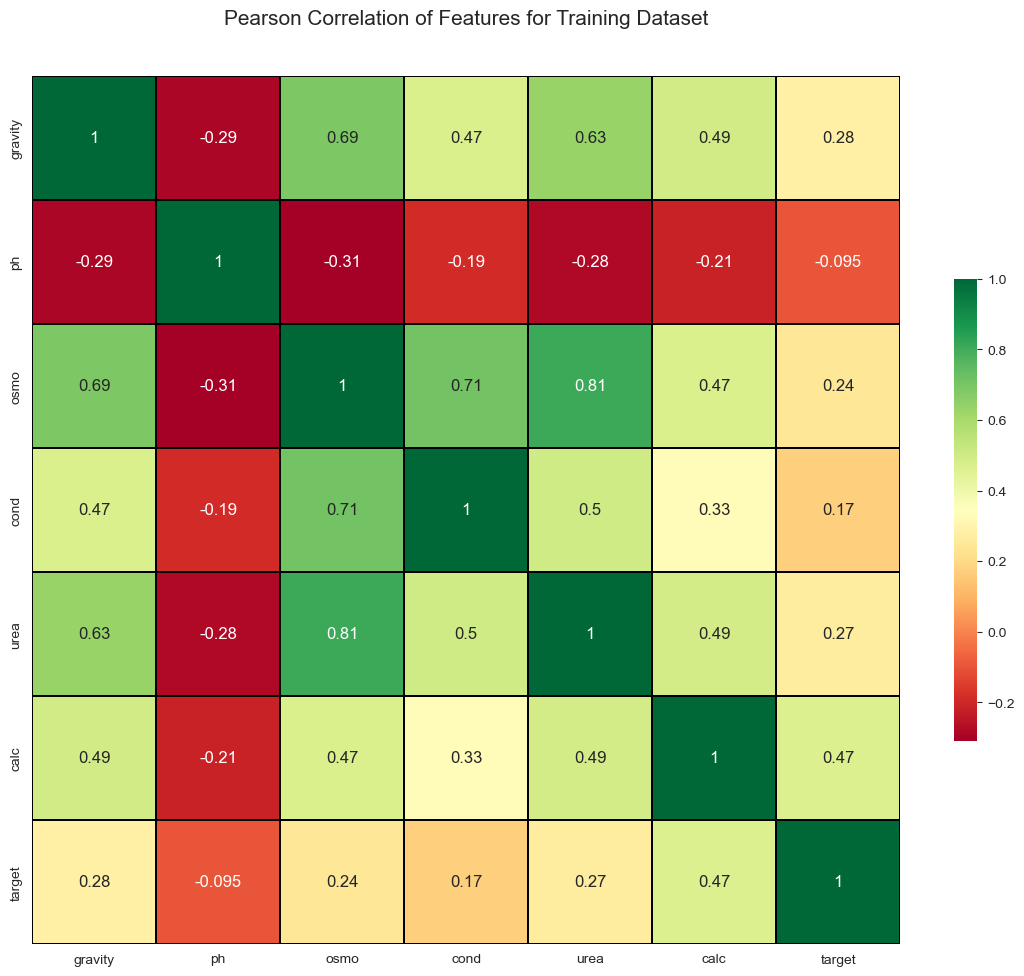

In [26]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "RdYlGn",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features for Training Dataset', y=1.05, size=15)

correlation_heatmap(train_data)

## <font>Summary of Correlation Heatmap of Train Dataset<font><a class='anchor' id='top'></a>

Here in the Train Dataset we see some correlated features, by using the Pearson Correlation metric we can see various values

`Observation 1`:

If we observe the features `urea` and `osmo` we see a `positive correlation of (+0.81)`

It means that when the value of the `urea` variable increases then the value of the other variable(s) `osmo` also increases.

A strong positive (upward sloping) linear relationship

`Observation 2`:

If we observe the features `cond` and `osmo` we see a `positive correlation of (+0.71)`

It means that when the value of the `cond` variable increases then the value of the other variable(s) `osmo` also increases.

A strong positive (upward sloping) linear relationship

`Observation 3`:

If we observe the features `gravity` and `osmo` we see a `positive correlation of (+0.69)`

It means that when the value of the `gravity` variable increases then the value of the other variable(s) `osmo` also increases.

A strong positive (upward sloping) linear relationship

`Observation 4`:

If we observe the features `gravity` and `urea` we see a `positive correlation of (+0.63)`

It means that when the value of the `gravity` variable increases then the value of the other variable(s) `urea` also increases.

A moderately strong positive (upward sloping) linear relationship


`Conclusion`: 

These are either highly correlated features or moderately correlated features.

It is recommended to `avoid having correlated features` in your dataset. A group of highly correlated features `will not bring additional information`, but will `increase the complexity of the algorithm`, thus increasing the `risk of errors`.

`Decision`: 

<div class="alert alert-block alert-info">

📌 We will either decide on dropping a feature(s) or keeping them in the `Feature Engineering` Phase of the project

</div>

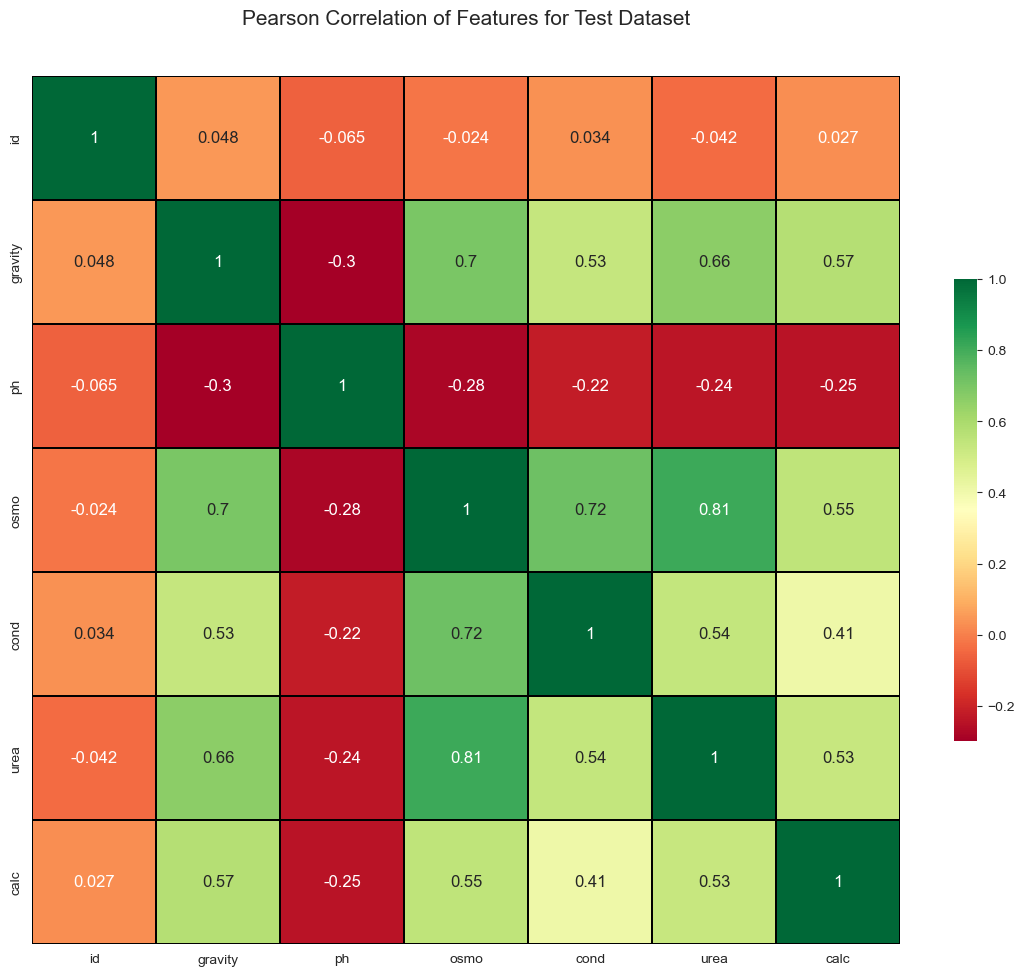

In [28]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "RdYlGn",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features for Test Dataset', y=1.05, size=15)
correlation_heatmap(test_data)

## <font>Pair Plots<font><a class='anchor' id='top'></a>


What do Pair Plots really show us?



Pair plots, also known as scatterplot matrices, are a type of data visualization that display pairwise relationships between multiple variables in a dataset. 

In machine learning, pair plots can be used to:


- `Identify patterns`: 

    Pair plots can reveal patterns or trends in the data that may not be apparent from individual scatterplots.


- `Detect outliers`: 

    Outliers can be easily spotted in pair plots, allowing for further investigation.

- `Assess correlation`: 

    Pair plots can help us identify the strength and direction of linear relationships between variables. This can be useful in feature selection and model building.

- `Explore data distributions`: 

    Pair plots can help us understand the distribution of each variable in the dataset, and identify any potential issues such as skewness or outliers.


From the output below, we can observe the variations in each plot. The plots are in matrix format where the row name represents x axis and column name represents the y axis. The main-diagonal subplots are the univariate histograms (distributions) for each attribute.

<Figure size 1200x1000 with 0 Axes>

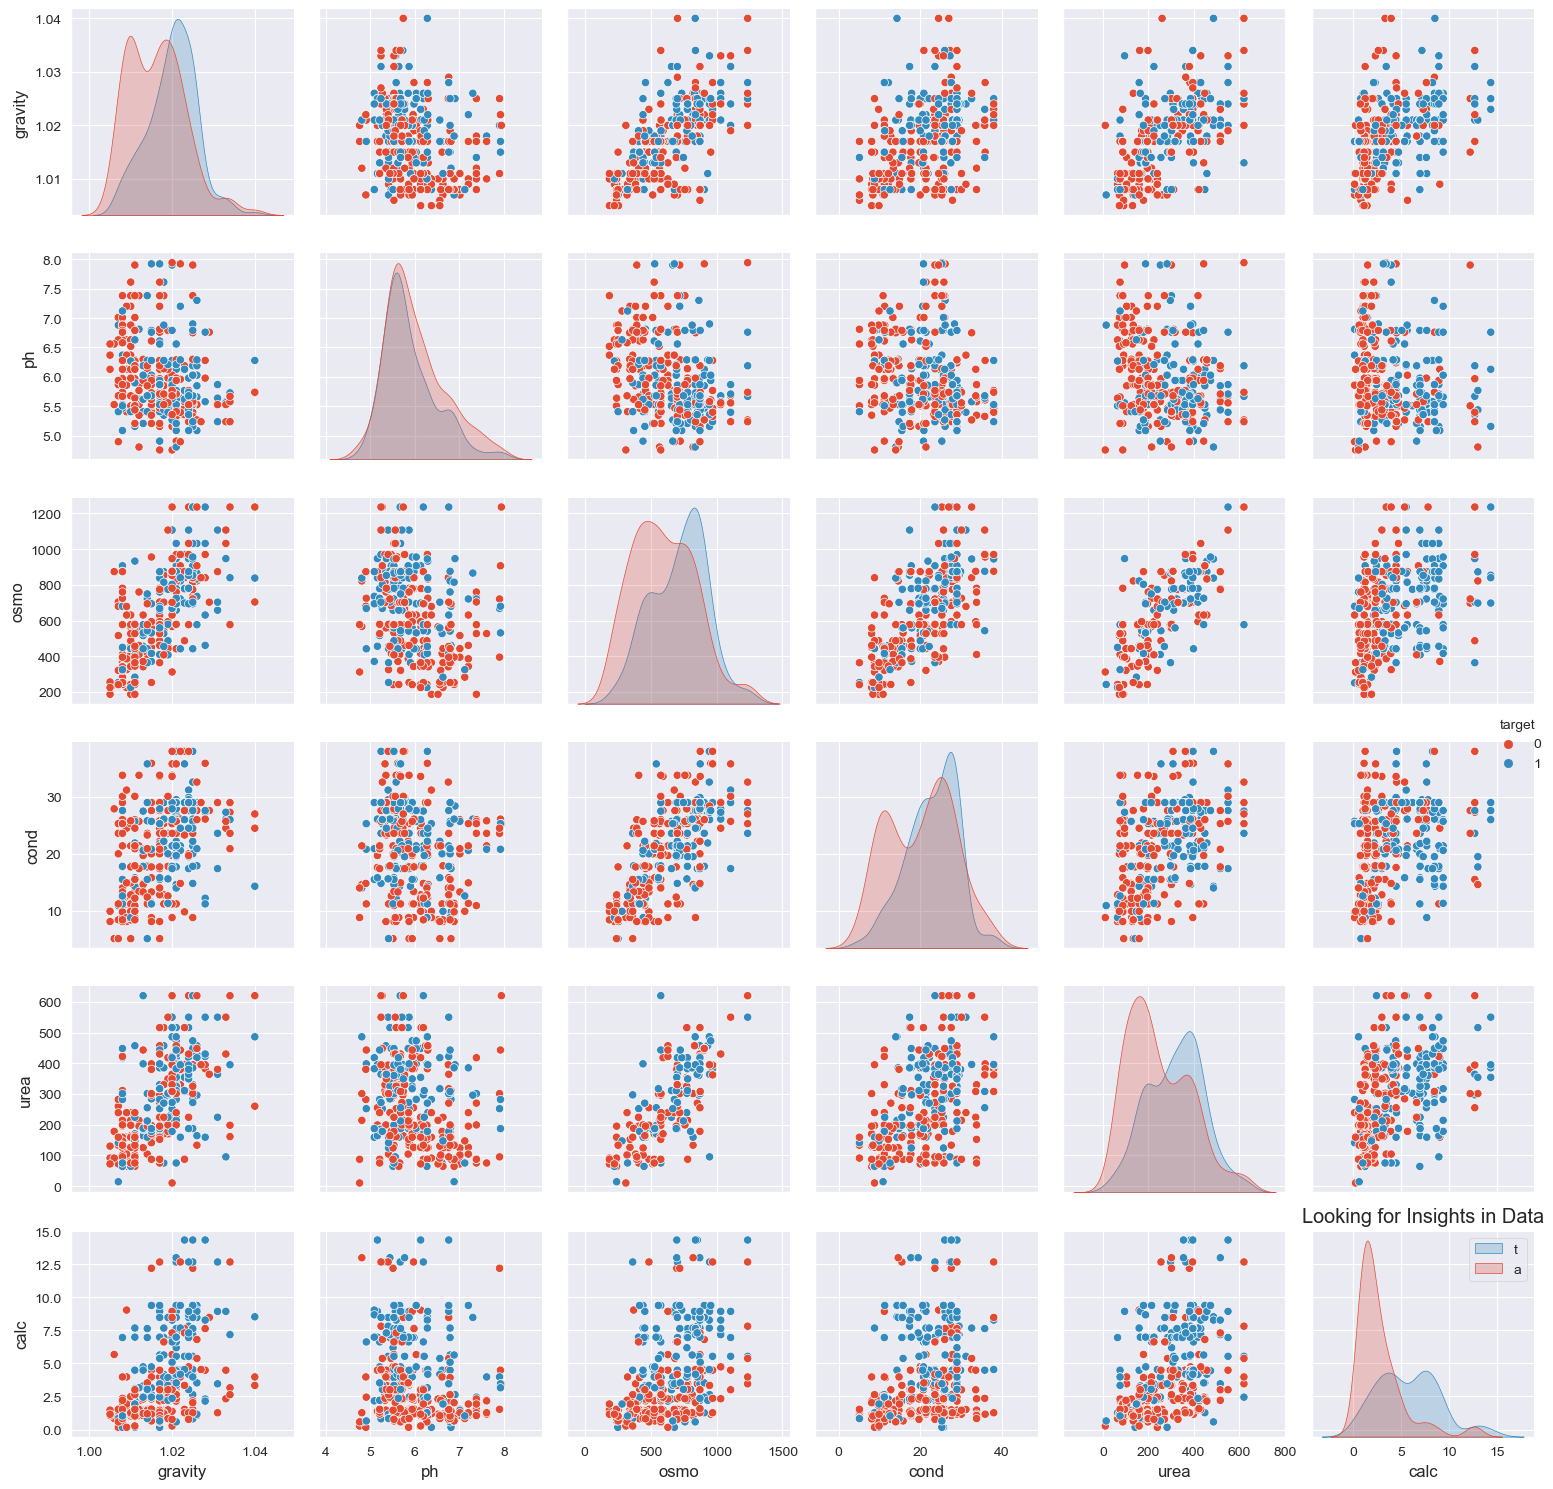

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.pairplot(train_data,hue="target")
plt.title("Looking for Insights in Data")
plt.legend("target")
plt.tight_layout()
plt.plot()
plt.show()

## <font>Distribution of Data<font><a class='anchor' id='top'></a>

`Interpreting our Histograms`

`Looking for Skewness`

Data is skewed when its distribution curve is asymmetrical and skewness is the measure of the asymmetry. 

The skewness for a `normal distribution is 0`. There are 2 different types of skews in data, `left(negative)`, and `right(positive)`.

`Effects of skewed data`: Degrades the models’ ability to describe typical cases as it has to deal with rare cases on extreme values. Right skewed data will predict better on data points with lower values as compared to those with higher values. Skewed data doesn’t work well with many statistical methods.

To ensure that the machine learning model capabilities are not affected, skewed data has to be `transformed` to approximate a normal distribution. The method used to transform the skewed data depends on the characteristics of the data:

1. `Log Transformation`
2. `Remove Outliers`
3. `Normalization (Min-Max)`
4. `Square root`: applied only to positive values
5. `Square`: applied on left skew

In [30]:
train_data.skew().sort_values(ascending=False)

calc       1.118533
ph         0.971308
urea       0.329107
gravity    0.291010
target     0.224421
osmo       0.147395
cond      -0.212009
dtype: float64

Using this information to reach conclusions about the skewness of the data

- `calc     1.118533`: (Highly/Positively Skewed, this is reflected on the distribution graph with the values towards the left of the graph)

- `ph       0.971308`: (Highly/Positively Skewed, this is reflected on the distribution graph with the values towards the left of the graph)

- `urea     0.329107`: (Fairly symmetrical)

- `gravity  0.291010`: (Fairly symmetrical)

- `target   0.224421`: (Fairly symmetrical)

- `osmo     0.147395`: (Fairly symmetrical)

- `cond    -0.212009`: (Fairly symmetrical)

`Decision`:
We will keep all the features as is for now but should perform some transformation to the skewed data features in feature engineering.

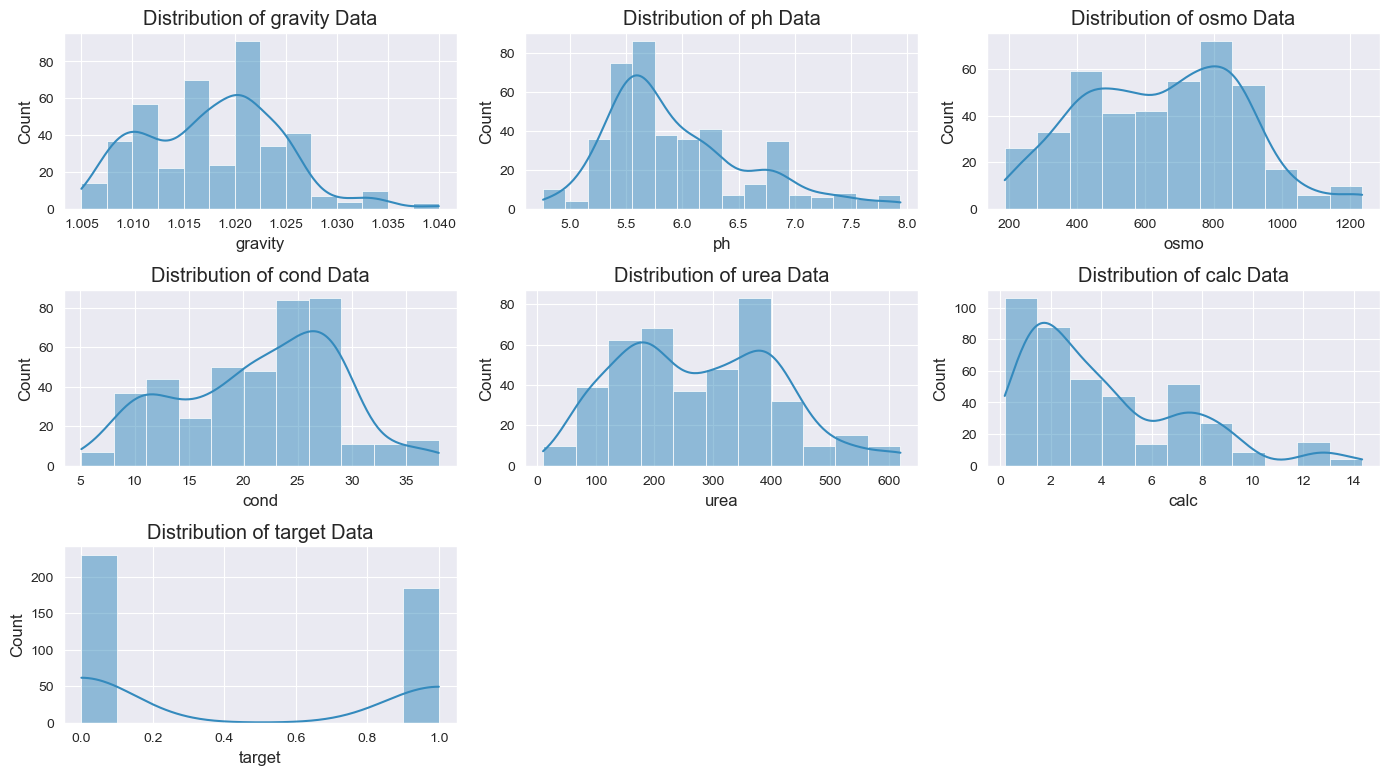

In [31]:
plt.figure(figsize=(14,10))
plt.title("Distribution of feature Data in the Train Dataset")
for i,col in enumerate(train_data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(train_data[col],kde=True)
    plt.tight_layout()
    plt.plot()
plt.show()

## <font>Box Plots<font><a class='anchor' id='top'></a>



Text(0, 0.5, 'count')

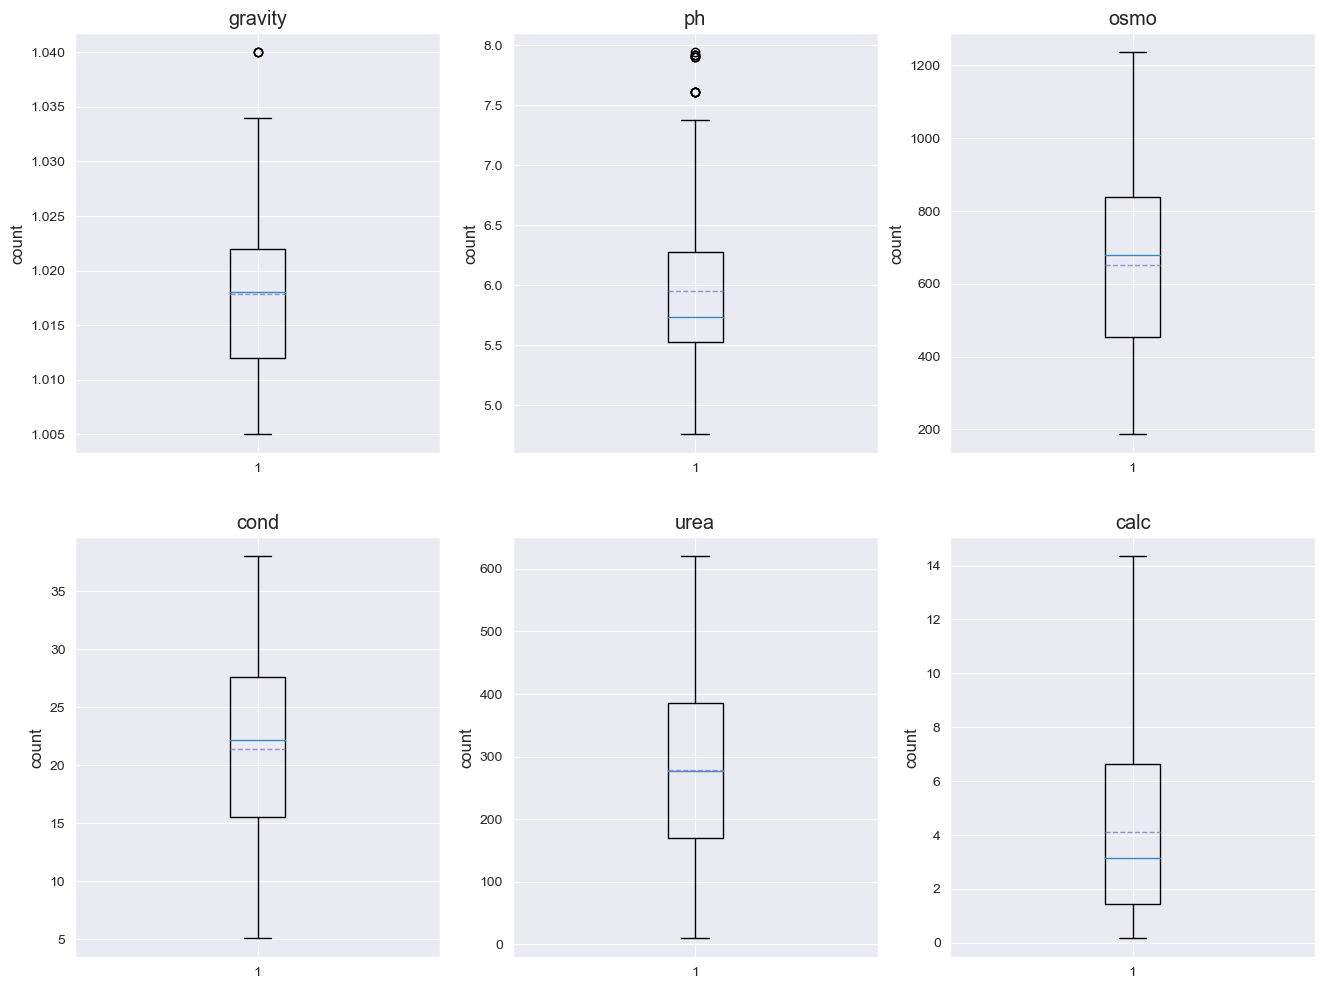

In [32]:
#graph distribution of quantitative data or numerical variables
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(x=train_data['gravity'], showmeans = True, meanline = True)
plt.title('gravity')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(232)
plt.boxplot(x=train_data['ph'], showmeans = True, meanline = True)
plt.title('ph')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(233)
plt.boxplot(x=train_data['osmo'], showmeans = True, meanline = True)
plt.title('osmo')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(234)
plt.boxplot(x=train_data['cond'], showmeans = True, meanline = True)
plt.title('cond')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(235)
plt.boxplot(x=train_data['urea'], showmeans = True, meanline = True)
plt.title('urea')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(236)
plt.boxplot(x=train_data['calc'], showmeans = True, meanline = True)
plt.title('calc')
plt.ylabel('count')

## <font> Summary of Box Plots<font><a class='anchor' id='top'></a>

`Why do we get rid of outliers`:

Outliers are very different values—abnormally low or abnormally high—their presence can often skew the results of statistical analyses on the dataset. This could lead to less effective and less useful models.

`Observation 1`:

We can see that some of our features have outliers, these features are:

- gravity
- ph 


`Decision`:We will remove outliers or do some form of transformation in the feature engineering phase of our project.

## <font>Evaluate XGBoost Classifier Models With Train and Test Sets<font><a class='anchor' id='top'></a>

Note 1:

We are just implementing a bare minimum XGBClassifier model to get a feel for splitting train and test sets and running a classifier model on the data to get a feel for implementation, will later perform Hyper-Parameter tuning, Feature Engineering and data scaling if necessary.

Note 2:

MinMaxScaler() in scikit-learn is used for data normalization (a.k.a feature scaling). Data normalization is not necessary for decision trees. Since XGBoost is based on decision trees, decision trees do not require normalization of their inputs. 

While decision trees have a natural resistance to outliers, boosted trees are susceptible, since new trees are built off the residual. Normalization, or even just a log transform, will give you better protection from outliers.

Therefore we will implement both non-normalization and normalization

But for now I have implemented XGBClassifier without normalization because its very easy and fast to get a feel for it.


## <font>XGBClassifier Default Implementation #1<font><a class='anchor' id='top'></a>

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split data into X and y

X = train_data.drop(['target'], axis=1)
y = train_data['target'] 

# split data into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.24, random_state=7)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 69.00%


As you can see the default gives us an accuracy score of 69%, which is pretty bad but remember this is just the default.

## <font>XGBClassifier Monitor Performance and Early Stopping Implementation #2<font><a class='anchor' id='top'></a>

The XGBoost model can evaluate and report on the performance on a test set for the model during training.

It supports this capability by specifying both a test dataset and an evaluation metric on the call to model.fit() when training the model and specifying verbose output `(verbose=True)`.

For example, we can report on the `binary classification error rate (error)` on a standalone test set `(eval_set)` while training an XGBoost model

We can use this evaluation to stop training once `no further improvements` have been made to the model.

We can do this by setting the `early_stopping_rounds` parameter when calling model.fit() to the number of iterations that no improvement is seen on the validation dataset before training is stopped.

In [35]:
# split data into X and y

X = train_data.drop(['target'], axis=1)
y = train_data['target'] 

# split data into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=7)


model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.62712
[1]	validation_0-logloss:0.59917
[2]	validation_0-logloss:0.58633
[3]	validation_0-logloss:0.58702
[4]	validation_0-logloss:0.58995
[5]	validation_0-logloss:0.58979
[6]	validation_0-logloss:0.60796
[7]	validation_0-logloss:0.60944
[8]	validation_0-logloss:0.62019
[9]	validation_0-logloss:0.62793
[10]	validation_0-logloss:0.63466
[11]	validation_0-logloss:0.63171
Accuracy: 72.99%


As we can see we managed to get a slightly higher score of 73%.

## <font>Feature Engineering Intro I<font><a class='anchor' id='top'></a>

Feature engineering is a machine learning technique that leverages data to `create new variables` that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

`Feature Creation`: Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features. 

`Transformations`: Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.

`Feature Extraction`: Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process.

Let's see if we can do some Feature Engineering to possibly getting more accurate results from our ML models




In [36]:
train_data.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


## <font>Asking ChatGPT about Feature Engineering for the features<font><a class='anchor' id='top'></a>

I asked Chat GPT to give me some help with ideas for feature engineering here is what it had to say:

`Feature scaling`: You could use min-max scaling to scale all the features to a range of 0 to 1. This will ensure that no one feature dominates the others.

`Feature encoding`: None of the features you've provided are categorical variables, so there is no need for feature encoding.

`Feature selection`: You could use correlation-based feature selection to identify the features that are most strongly correlated with the presence of kidney stones. For example, you could calculate the correlation between each feature and the presence of kidney stones, and select the features with the highest correlation.

`Feature extraction`: You could extract additional features from the provided features, such as the ratio of certain measurements or the presence of specific compounds in the urine. For example, you could calculate the calcium oxalate supersaturation index, which is a ratio of the calcium and oxalate concentrations, or the ammonium urate crystallization index, which is a ratio of the ammonium and urate concentrations.

`Feature engineering using domain knowledge`: You could engineer features based on your understanding of kidney stone formation and the role of urine composition in stone formation. For example, you could engineer features related to the concentration of certain minerals or the acidity of the urine. You could also engineer features related to the volume of urine produced, as the volume of urine can affect the concentration of minerals and other compounds in the urine.


In summary: the goal of feature engineering is to create a set of features that will help your machine learning algorithm make accurate predictions. It's important to understand the problem domain and the data you're working with, and to experiment with different feature engineering techniques to find the most effective approach.

# <font>Final ML Model<font><a class='anchor' id='top'></a>

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Separate the features and target variable
X = train_data.drop('target', axis=1)
y = train_data['target']

# Split the train_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the numerical features by scaling them and adding polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train = scaler.fit_transform(X_train)
X_train = poly.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = poly.transform(X_test)

# Define the hyperparameter grid for logistic regression
param_grid = {'C': [0.1, 0.5, 1, 5, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 500, 1000]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Train a logistic regression model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Confusion matrix: \n{confusion}')
print(f'ROC AUC score: {roc_auc}')

Best hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.7831325301204819
Confusion matrix: 
[[35 10]
 [ 8 30]]
ROC AUC score: 0.8578947368421053


In [38]:
# Preprocess the numerical features in the test dataset
X_test = test_data.drop('id', axis=1)
X_test = scaler.transform(X_test)
X_test = poly.transform(X_test)

# Make predictions on the test set and create a submission file for Kaggle
test_predictions = best_model.predict_proba(X_test)[:,1]
submission = pd.DataFrame({'id': test_data['id'], 'target': test_predictions})
submission.to_csv('submission.csv', index=False)

## <font>Summary of our ML Model<font><a class='anchor' id='top'></a>

`Import libraries and modules`: The code starts by importing necessary libraries and modules from scikit-learn, including train_test_split, GridSearchCV, StandardScaler, PolynomialFeatures, LogisticRegression, accuracy_score, confusion_matrix, and roc_auc_score. These modules will be used for data preprocessing, model selection, hyperparameter tuning, model training, and model evaluation.

`Load and prepare the data`: The code then loads the training data and separates the features and target variable. The features are stored in a variable X, and the target variable is stored in a variable y. The code then uses train_test_split to split the data into training and testing sets with a 80:20 ratio.

`Preprocess the data`: The code then preprocesses the numerical features in the training and testing data using StandardScaler and PolynomialFeatures. The StandardScaler scales the features so that they have zero mean and unit variance, and the PolynomialFeatures creates new polynomial features up to the second degree.

`Define the hyperparameter grid`: The code defines a dictionary param_grid that specifies different values of the hyperparameters C, penalty, solver, and max_iter to search over using grid search.
Perform grid search: The code uses GridSearchCV to perform grid search with cross-validation to find the best hyperparameters for logistic regression that maximize the roc_auc score. The code uses the training data, LogisticRegression model with a random state of 42, and the param_grid dictionary to perform the search.

`Train the model`: The code then trains a logistic regression model with the best hyperparameters found in step 5 using the training data. The best model is obtained from the GridSearchCV object using the best_estimator_ attribute.

`Evaluate the model`: The code predicts the target variable for the testing set using the trained model and calculates the predicted probabilities of the positive class. It then evaluates the performance of the model using accuracy, confusion matrix, and ROC AUC score, and prints out the results.

## <font>Min-Max Scaling/ Pre-Processing<font><a class='anchor' id='top'></a>
    
`Normalization` is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values.
This will ensure that no one feature dominates the others.

A value is normalized as follows:

`y = (x – min) / (max – min)`

Where the minimum and maximum values pertain to the value x being normalized.



We will also combine both our train and original datasets

In [39]:
print(train_data.shape)

train = pd.concat([train_data, original_data])

(414, 7)


In [40]:
print(train.shape)
print(train.duplicated(keep=False))

duplicate = train[train.duplicated()]
 
print("Duplicate Rows in the New Dataframe:")
 
# Print the resultant Dataframe
print(duplicate)

(493, 7)
0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 493, dtype: bool
Duplicate Rows in the New Dataframe:
Empty DataFrame
Columns: [gravity, ph, osmo, cond, urea, calc, target]
Index: []


In [41]:
# Scale the values of the features to a range of 0 to 1 using min-max scaling
train_scaled = (train - train.min()) / (train.max() - train.min())

In [42]:
train_scaled.head()

,gravity,ph,osmo,cond,urea,calc,target
0,0.228571,0.449686,0.244042,0.294833,0.186885,0.090332,0.0
1,0.571429,0.201258,0.491897,0.562310,0.629508,0.282992,0.0
2,0.114286,0.430818,0.175405,0.589666,0.244262,0.625970,0.0
3,0.457143,0.047170,0.243089,0.477204,0.636066,0.455893,1.0
4,0.457143,0.242138,0.654909,0.386018,0.614754,0.143966,1.0


# <font>Removing Outliers<font><a class='anchor' id='top'></a>

We remove outliers from a dataset for several reasons:

`Outliers can affect the accuracy of statistical analyses`: Statistical analyses like mean, variance, and correlation are sensitive to outliers. Outliers can skew the distribution of data and lead to inaccurate results. Removing outliers can help improve the accuracy of statistical analyses.

`Outliers can affect the performance of machine learning models`: Machine learning models are trained on data, and outliers can affect the performance of these models. Outliers can result in overfitting, where the model fits the training data too closely and performs poorly on new data. Removing outliers can help improve the performance of machine learning models.

`Outliers can be the result of errors in data collection or measurement`: Outliers can be the result of errors in data collection or measurement. Removing these outliers can help improve the quality of the dataset and reduce the impact of these errors on the analysis.

`Outliers can be the result of rare events`: In some cases, outliers can be the result of rare events that are not representative of the typical behavior of the system being studied. Removing these outliers can help improve the accuracy of the analysis by focusing on the most representative data.

Overall, removing outliers can help improve the accuracy and reliability of data analyses and machine learning models. However, it's important to exercise caution when removing outliers as they can also contain important information that should not be discarded without careful consideration.

`Some ways to remove Outliers`:

`Z-score method`: In this method, we calculate the z-score for each data point in the dataset. If the z-score is greater than a threshold value (usually 3 or -3), the data point is considered an outlier. Once the outliers are identified, we can remove them from the dataset.

`Interquartile range (IQR) method`: In this method, we calculate the IQR for each feature in the dataset. Any data point that lies beyond 1.5 times the IQR from the first or third quartile is considered an outlier. These outliers can be removed from the dataset.

`Visualization`: Visualization techniques like box plots and scatter plots can help identify outliers in the data. Data points that fall outside the whiskers of a box plot or are far away from the cluster of other data points in a scatter plot may be considered outliers.

In [43]:
train_scaled.isnull()

,gravity,ph,osmo,cond,urea,calc,target
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
74,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False
77,False,False,False,False,False,False,False


In [44]:
train_scaled

,gravity,ph,osmo,cond,urea,calc,target
0,0.228571,0.449686,0.244042,0.294833,0.186885,0.090332,0.0
1,0.571429,0.201258,0.491897,0.562310,0.629508,0.282992,0.0
2,0.114286,0.430818,0.175405,0.589666,0.244262,0.625970,0.0
3,0.457143,0.047170,0.243089,0.477204,0.636066,0.455893,1.0
4,0.457143,0.242138,0.654909,0.386018,0.614754,0.143966,1.0
...,...,...,...,...,...,...,...
74,0.571429,0.987421,0.509056,0.562310,0.477049,0.625970,1.0
75,0.342857,0.015723,0.212583,0.249240,0.303279,0.028934,1.0
76,0.542857,0.201258,0.587226,0.507599,0.629508,0.539873,1.0
77,0.314286,0.644654,0.387989,0.495441,0.401639,0.848977,1.0


In [45]:
# Define a threshold value for outliers
threshold = 1.5

# Loop over each column in the dataset
for col in train_scaled.columns:
    # Calculate the interquartile range (IQR) for the current column
    Q1 = train_scaled[col].quantile(0.25)
    Q3 = train_scaled[col].quantile(0.75)
    IQR = Q3 - Q1

    # Find the indices of the outliers for the current column
    outlier_indices = train_scaled.index[(train_scaled[col] < Q1 - threshold * IQR) | (train_scaled[col] > Q3 + threshold * IQR)]

    # Replace the outlier values with NaNs for the current column
    train_scaled.loc[outlier_indices, col] = float('nan')

# Remove any rows that contain at least one NaN value
clean_data = train_scaled.dropna()

print("Original train_scaled: ")
print(train_scaled)
print()
print("Cleaned train_scaled: ")
print(clean_data)

Original train_scaled: 
     gravity        ph      osmo      cond      urea      calc  target
0   0.228571  0.449686  0.244042  0.294833  0.186885  0.090332     0.0
1   0.571429  0.201258  0.491897  0.562310  0.629508  0.282992     0.0
2   0.114286  0.430818  0.175405  0.589666  0.244262  0.625970     0.0
3   0.457143  0.047170  0.243089  0.477204  0.636066  0.455893     1.0
4   0.457143  0.242138  0.654909  0.386018  0.614754  0.143966     1.0
..       ...       ...       ...       ...       ...       ...     ...
74  0.571429       NaN  0.509056  0.562310  0.477049  0.625970     1.0
75  0.342857  0.015723  0.212583  0.249240  0.303279  0.028934     1.0
76  0.542857  0.201258  0.587226  0.507599  0.629508  0.539873     1.0
77  0.314286  0.644654  0.387989  0.495441  0.401639  0.848977     1.0
78  0.285714  0.399371  0.218303  0.234043  0.275410  0.650670     1.0

[493 rows x 7 columns]

Cleaned train_scaled: 
     gravity        ph      osmo      cond      urea      calc  target
0   0

## <font>Removing Outliers Summary<font><a class='anchor' id='top'></a>

We define a threshold value of 1.5 for outliers.

We then loop over each column in the dataset using the data.columns attribute. For each column, we calculate the interquartile range (IQR) using the quantile method of the column, find the indices of the outlier values using boolean indexing, and replace those values with NaNs using the loc method of the DataFrame.

Finally, we remove any rows that contain at least one NaN value from the original data DataFrame to obtain the cleaned data. We print out the original data and the cleaned data to verify that the outliers have been removed while maintaining the data frame's columns.